In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/password_strength_dataset/data1.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669879 entries, 0 to 669878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   password  669640 non-null  object 
 1   strength  669641 non-null  float64
dtypes: float64(1), object(1)
memory usage: 10.2+ MB


In [ ]:
df.describe()

,strength
count,669641.000000
mean,0.990195
std,0.507949
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
# Checking for missing values
df.dropna(inplace=True)

# Separating features and target
X = df['password']
y = df['strength']

In [ ]:
# Convert text passwords into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 5))
X_tfidf = vectorizer.fit_transform(X)

# Splitting the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Applying Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred, digits = 4))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.8961

Classification Report:
               precision    recall  f1-score   support

         0.0     0.6154    0.9944    0.7603     26911
         1.0     0.9931    0.8680    0.9263    149040
         2.0     0.8803    0.9580    0.9175     24941

    accuracy                         0.8961    200892
   macro avg     0.8296    0.9401    0.8680    200892
weighted avg     0.9285    0.8961    0.9030    200892


Confusion Matrix:
 [[ 26760    148      3]
 [ 16432 129362   3246]
 [   290    757  23894]]


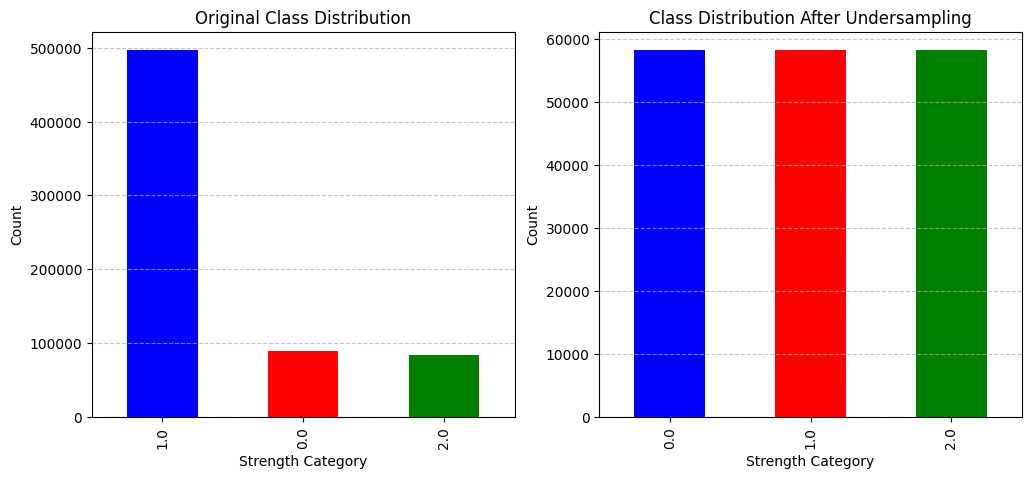

In [ ]:
# Plotting class distribution before and after Undersampling
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df['strength'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'], ax=ax[0])
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Strength Category')
ax[0].set_ylabel('Count')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

pd.Series(y_train_resampled).value_counts().plot(kind='bar', color=['blue', 'red', 'green'], ax=ax[1])
ax[1].set_title('Class Distribution After Undersampling')
ax[1].set_xlabel('Strength Category')
ax[1].set_ylabel('Count')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
